# Google Cloud CMIP6 Public Data: Basic Python Example

This notebooks shows how to query the catalog and load the data using python

In [16]:
from matplotlib import pyplot as plt, animation
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import zarr
import fsspec
from mpl_toolkits import mplot3d

%matplotlib notebook
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 12, 6

## Browse Catalog

The data catatalog is stored as a CSV file. Here we read it with Pandas.

In [17]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,huss,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


The columns of the dataframe correspond to the CMI6 controlled vocabulary. A beginners' guide to these terms is available in [this document](https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q). 

Here we filter the data to find monthly surface air temperature for historical experiments.

In [18]:
df_co2 = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'co2' & experiment_id == 'historical'")
df_co2



,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
42878,CMIP,BCC,BCC-CSM2-MR,historical,r2i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181115
42985,CMIP,BCC,BCC-CSM2-MR,historical,r3i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181119
43283,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181126
44228,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Amon,co2,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
44902,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,NaN,20181217
44915,CMIP,BCC,BCC-ESM1,historical,r2i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,NaN,20181217
44930,CMIP,BCC,BCC-ESM1,historical,r3i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,NaN,20181217
50727,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Amon,co2,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
51014,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Amon,co2,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
51480,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Amon,co2,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125


Now we do further filtering to find just the models from NCAR.

In [19]:
df_co2_ncar = df_co2.query('institution_id == "NCAR"')
df_co2_ncar

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
77440,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190415
77732,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190415
77794,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190415
377144,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20191105
377169,CMIP,NCAR,CESM2,historical,r9i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r9...,NaN,20191105
377171,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20191105
377172,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20191105
377174,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20191105
377178,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20191105
377179,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,co2,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20191105


## Load Data

Now we will load a single store using fsspec, zarr, and xarray.

In [31]:
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_co2_ncar.zstore.values[-1]
print(zstore)

# create a mutable-mapping-style interface to the store
mapper = fsspec.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds   

gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM-FV2/historical/r1i1p1f1/Amon/co2/gn/v20191120/


<xarray.Dataset>
Dimensions:    (time: 1980, plev: 19, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(96, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    co2        (time, plev, lat, lon) float32 dask.array<chunksize=(133, 19, 96, 144), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  10950.0
    case_id:                1562
    ...                     ...
    tracking_id:            hdl:21.14100/d4ceeed9-3fc4-4b3a-8b08-cdc8183ff087...
    variable_id:            co2
    variant_info:           CMIP6 CESM2 historical ensemble with WACCM6-FV2 (...
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/d4ceeed9-3fc4-4b3a-8b08-cdc8183ff087...
    version_id:             v20191120

In [26]:
clevs = np.linspace(200, 320, 121)
latitude = ds.co2.lat
longitude = ds.co2.lon
data=ds.co2.isel(time=0).as_numpy()


TypeError: unhashable type: 'DataArray'

In [22]:
cs = plt.contourf(longitude, latitude, data, clevs)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'contour3D'

<IPython.core.display.Javascript object>


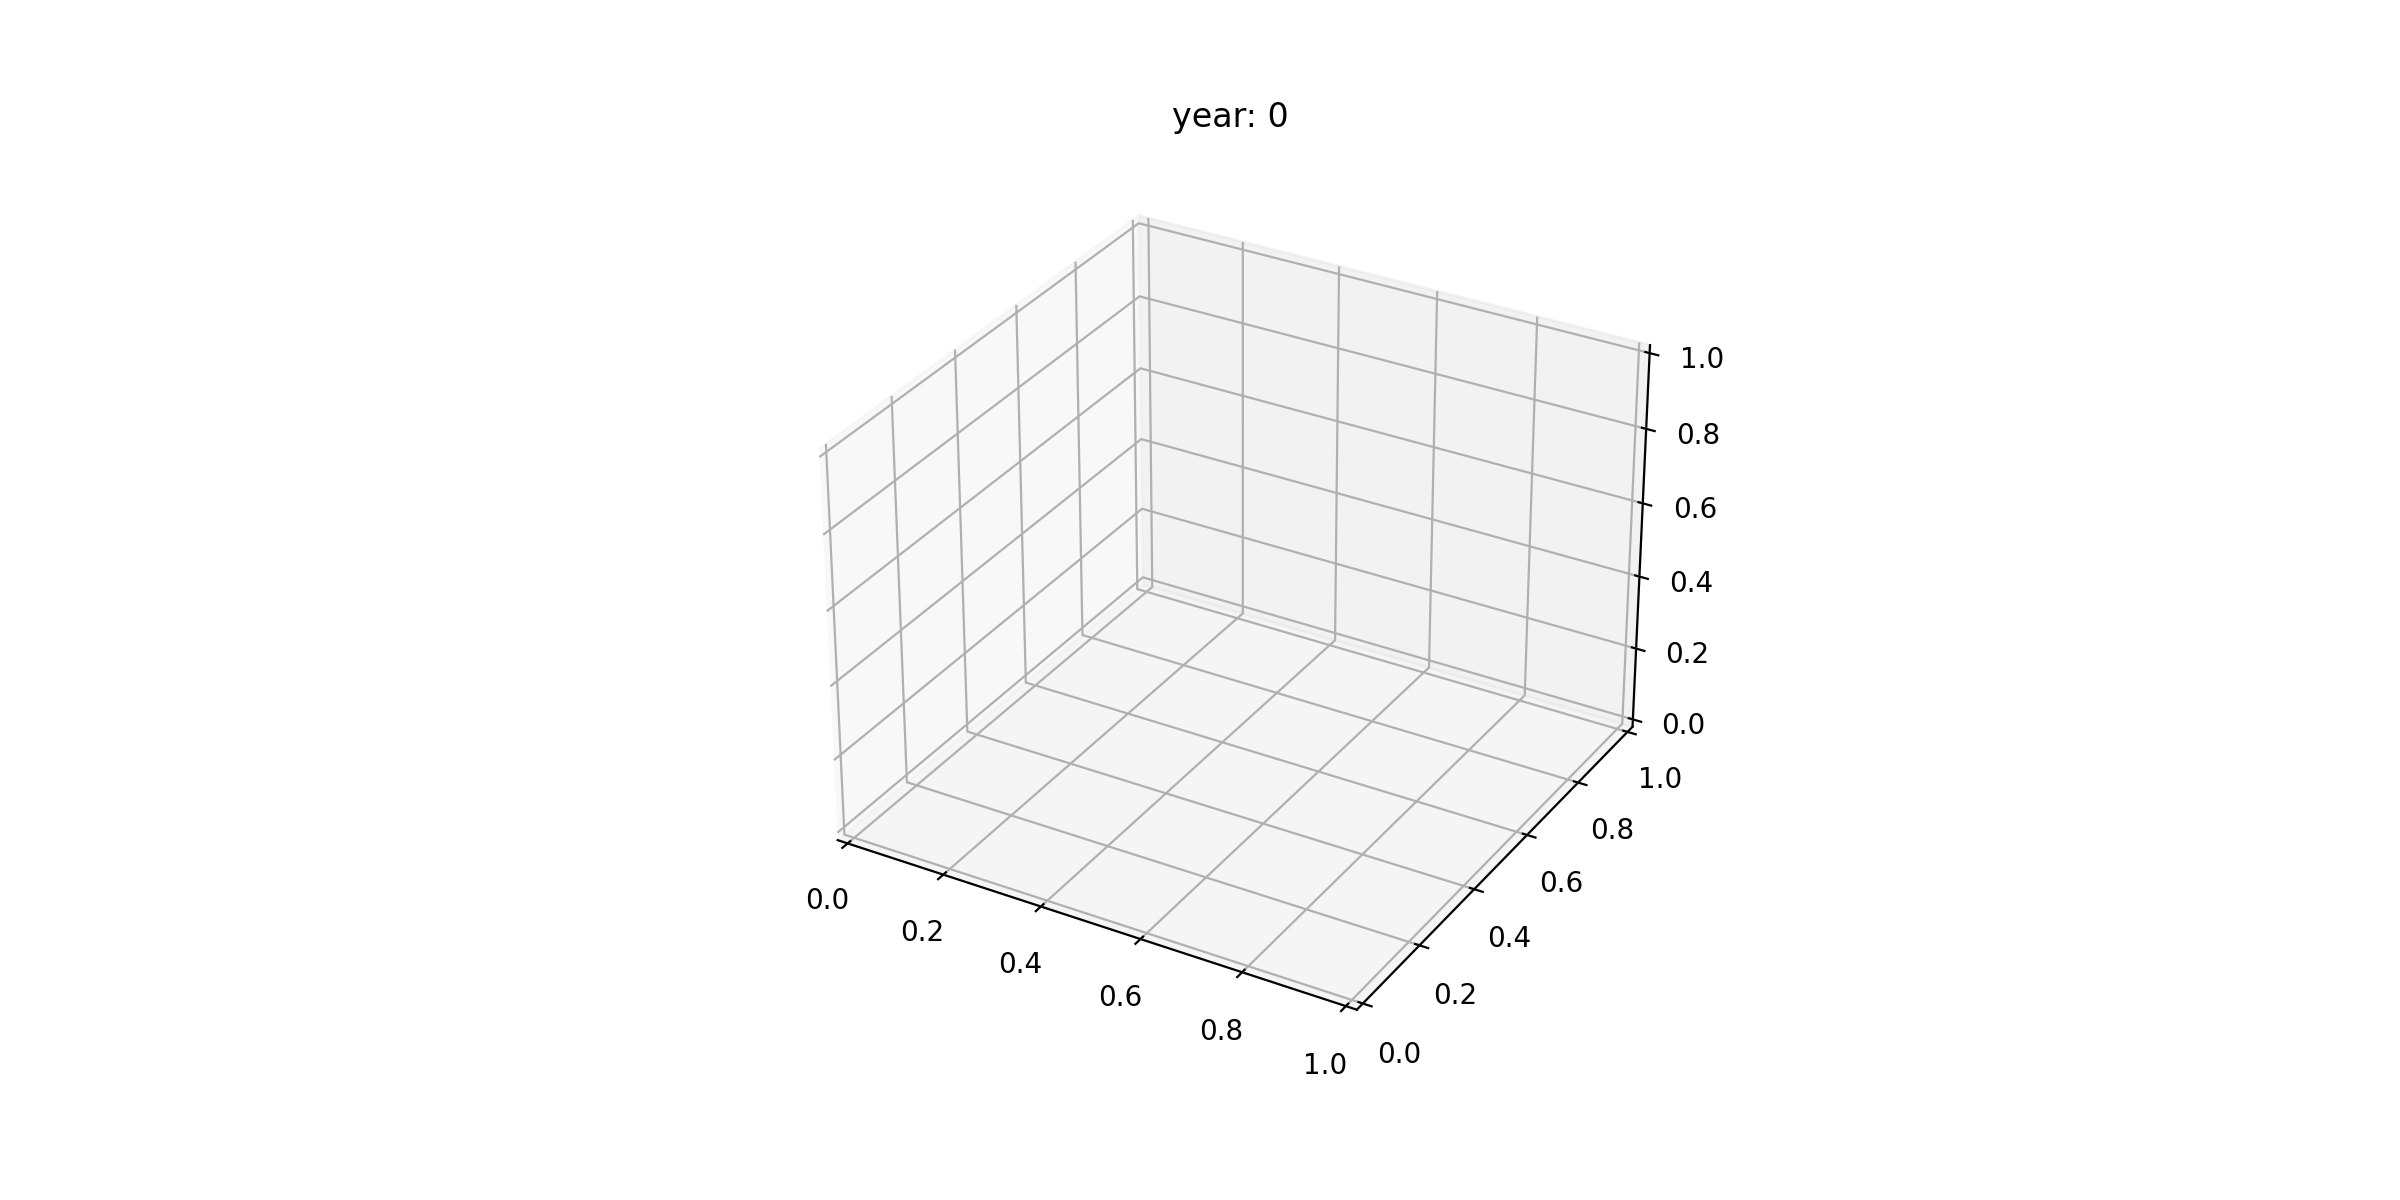

TypeError: Too many arguments to contour; see help(contour)

In [24]:
fig = plt.figure(1)
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
latitude = ds.tas.lat
longitude = ds.tas.lon
clevs = np.linspace(200, 320, 121)
ims = []
for year in range(0, 2):
    data = ds.tas.isel(time=year).as_numpy()
    plt.title(f'year: {year}')
    cs = ax.contourf(longitude, latitude, data, clevs)
    ims.append(cs.collections)
ani = animation.ArtistAnimation(fig, ims, interval=100)
ani

In [186]:
plt.show()

Plot a map from a specific date.

<xarray.DataArray 'tas' (lat: 96, lon: 144)>
dask.array<getitem, shape=(96, 144), dtype=float32, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     object 2012-07-15 12:00:00
Attributes: (12/20)
    _ChunkSizes:    [1, 96, 144]
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas


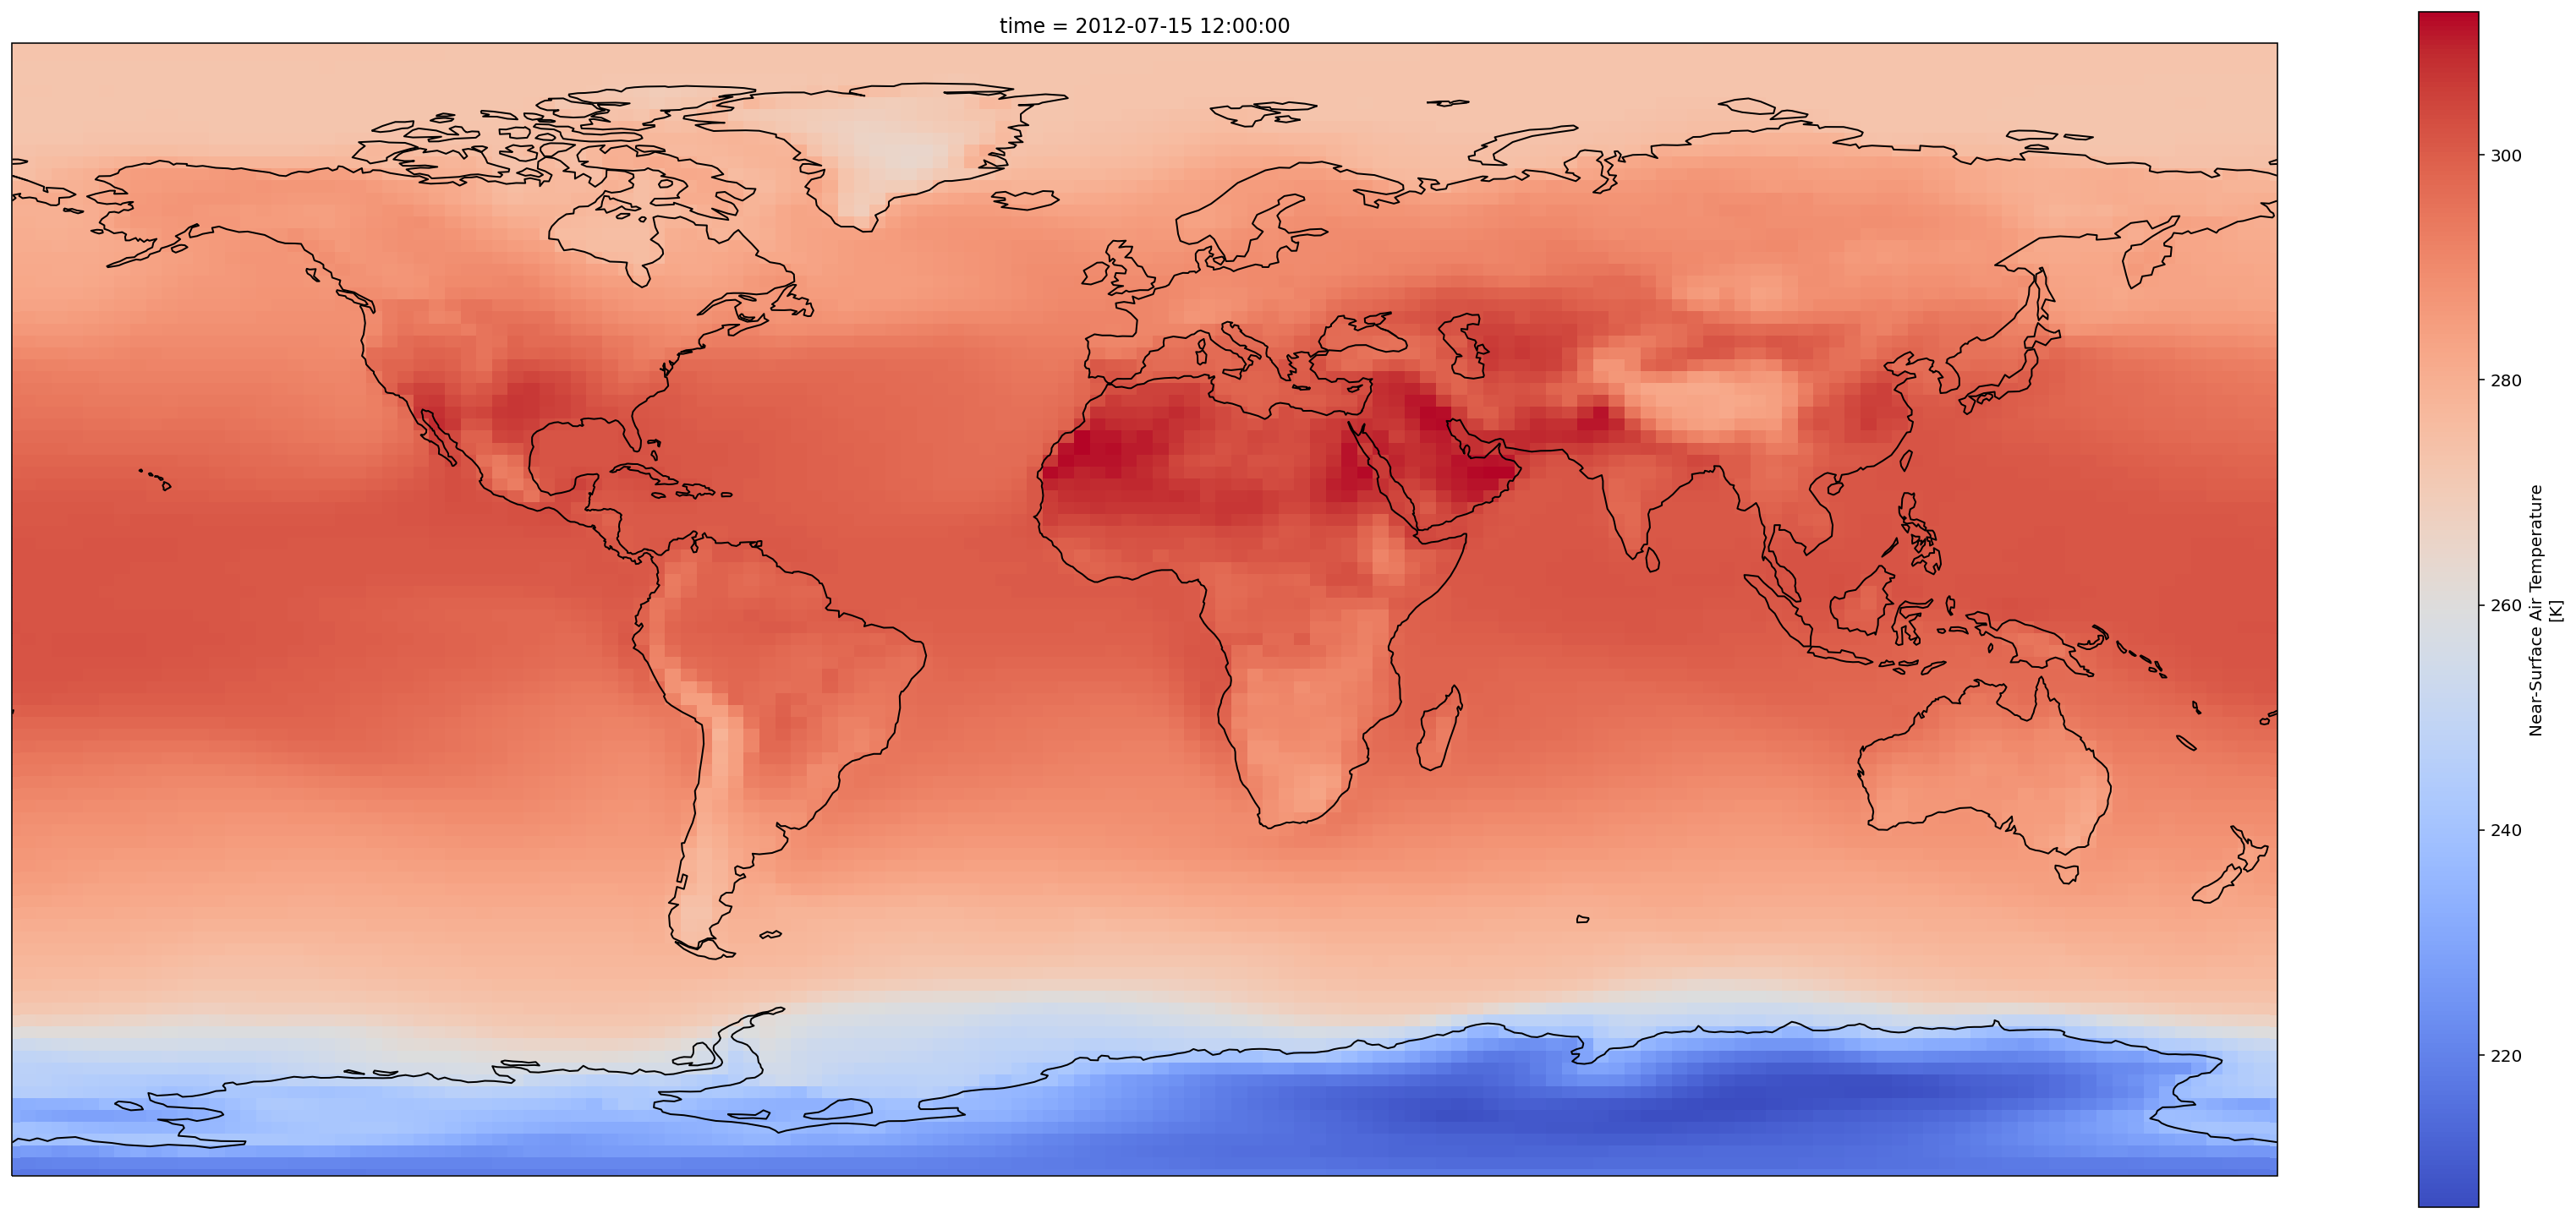

In [109]:
fig = plt.figure(1, figsize = [30,13])
ax = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
ax.coastlines()

dates = []
images = []
images.append(ds['tas'].isel(time=1950).plot.pcolormesh(ax=ax, cmap='coolwarm'))
for x in range(1951, 1953):
    dates.append(str(x))
def image_():
    ds['tas'].isel(time=date).plot.pcolormesh(ax=ax, cmap='coolwarm')
print(ds['tas'].isel(time=1950))
anim = animation.FuncAnimation(fig, images, interval=1000, repeat_delay = 1000)

Create a timeseries of global-average surface air temperature. For this we need the area weighting factor for each gridpoint.

In [ ]:
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2'")
ds_area = xr.open_zarr(fsspec.get_mapper(df_area.zstore.values[0]), consolidated=True)
ds_area

In [ ]:
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])
ta_timeseries = (ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
ta_timeseries

By default the data are loaded lazily, as Dask arrays. Here we trigger computation explicitly.

In [ ]:
%time ta_timeseries.load()

In [ ]:
ta_timeseries.plot(label='monthly')
ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature')